<a href="https://colab.research.google.com/github/diepdangban/Datamining/blob/main/Data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython import get_ipython
from IPython.display import display

In [22]:
# 1.
#five-number summary (tính giá trị nhỏ nhất – min, tứ phân vị thứ nhất – Q1, trung vị – median hay tứ phân vị thứ hai – Q2, tứ phân vị thứ ba – Q3, Giá trị lớn nhất – max)
#trung bình (average)
#trung vị (mean)
#độ lệch chuẩn (standard deviation),
#phương sai (variance).

#Lấy giá đóng cửa mỗi ngày trong bảng Lịch sử giá làm giá cổ phiếu ngày hôm đó,
#hãy vẽ biểu đồ theo dõi sự biến động giá cổ phiếu.
# Quan sát lịch sử giá cổ phiếu xem có những đợt tăng hay giảm giá cổ phiếu nào (bất thường nếu có),
# tìm hiểu background (bối cảnh lịch sử) của công ty và thị trường xem có những yếu tố nào có thể là nguyên nhân tác động tới giá cổ phiếu của công ty (chưa cần thực hiện phép tính toán).

In [23]:
Price_History_URL  = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Simplize_HPG_PriceHistory_20250315.xlsx'
Price_History_URL2 = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Price_history.csv'
Financial_Indicator_URL = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Simplize_HPG_FinancialIndicator_20250315.xlsx'

financial_indicatior = pd.read_excel(Financial_Indicator_URL, engine='openpyxl')
price_history = pd.read_excel(Price_History_URL, engine='openpyxl')
price_history2 = pd.read_csv(Price_History_URL2)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
financial_indicatior = financial_indicatior.drop(financial_indicatior.index[:5])
financial_indicatior = financial_indicatior.drop(financial_indicatior.index[-7:])
financial_indicatior=financial_indicatior.T
financial_indicatior.columns=financial_indicatior.iloc[0]
financial_indicatior=financial_indicatior[1:]
financial_indicatior.drop_duplicates()
financial_indicatior.set_index(financial_indicatior.columns[0], inplace=True)
financial_indicatior = financial_indicatior.drop(columns=['Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng)','Chỉ tiêu Bảng cân đối (Tỷ đồng)','Chỉ số định giá',
                                                          'Chỉ số hiệu quả hoạt động','Chỉ số hiệu suất hoạt động','Chỉ số cơ cấu nguồn vốn','Chỉ số khả năng thanh toán',
                                                          'Thông tin doanh nghiệp'])

In [25]:
financial_indicatior.loc[financial_indicatior.index.isin(['Q1/2024', 'Q4/2023', 'Q3/2023']), '        Tăng trưởng vốn góp cổ phần'] = 0.3
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2022']), '        Tăng trưởng vốn góp cổ phần'] = 0.35
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2020']), '        Tăng trưởng vốn góp cổ phần'] = 0.3
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2016']), '        Tăng trưởng vốn góp cổ phần'] = 0.5

financial_indicatior['    EV/EBITDA'].fillna(financial_indicatior['    EV/EBITDA'].mean(), inplace=True)

financial_indicatior.isna().sum()

<ipython-input-25-f5d738ec887a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_indicatior['    EV/EBITDA'].fillna(financial_indicatior['    EV/EBITDA'].mean(), inplace=True)
<ipython-input-25-f5d738ec887a>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  financial_indicatior['    EV/EBITDA'].fillna(

,0
Unnamed: 0,
Doanh thu thuần,0
Tăng trưởng doanh thu,0
Lợi nhuận gộp,0
Tăng trưởng lợi nhuận gộp,0
Lợi nhuận thuần từ HĐKD,0
Tăng trưởng lợi nhuận thuần,0
Lợi nhuận trước thuế,0
Tăng trưởng lợi nhuận trước thuế,0
Lợi nhuận sau thuế của Cổ đông công ty mẹ,0


In [26]:
for column in financial_indicatior.columns:
  financial_indicatior[column] = pd.to_numeric(financial_indicatior[column], errors='coerce')

In [27]:
summary_table = pd.DataFrame(columns=['Chỉ số', 'Trung bình', 'Trung vị', 'Độ lệch chuẩn', 'Phương sai', 'Min', 'Q1', 'Q2', 'Q3', 'Max'])

for column in financial_indicatior.columns:
  try:
    mean_value = np.mean(financial_indicatior[column])
    median_value = np.median(financial_indicatior[column])
    std_value = np.std(financial_indicatior[column])
    var_value = np.var(financial_indicatior[column])
    min_value = np.min(financial_indicatior[column])
    q1_value = np.percentile(financial_indicatior[column], 25)
    q2_value = np.percentile(financial_indicatior[column], 50)
    q3_value = np.percentile(financial_indicatior[column], 75)
    max_value = np.max(financial_indicatior[column])

    new_row = pd.DataFrame({'Chỉ số': [column],
                            'Trung bình': [mean_value],
                            'Trung vị': [median_value],
                            'Độ lệch chuẩn': [std_value],
                            'Phương sai': [var_value],
                            'Min': [min_value],
                            'Q1': [q1_value],
                            'Q2': [q2_value],
                            'Q3': [q3_value],
                            'Max': [max_value]})
    summary_table = pd.concat([summary_table, new_row], ignore_index=True)
  except:
    pass
summary_table


<ipython-input-27-147c7c272efb>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_table = pd.concat([summary_table, new_row], ignore_index=True)


,Chỉ số,Trung bình,Trung vị,Độ lệch chuẩn,Phương sai,Min,Q1,Q2,Q3,Max
0,Doanh thu thuần,2.163520e+13,1.860401e+13,1.166989e+13,1.361864e+26,5837935914731,1.205801e+13,1.860401e+13,3.187172e+13,44710731501475
1,Tăng trưởng doanh thu,2.170100e-01,2.077500e-01,2.664613e-01,7.100164e-02,-0.4224,7.797500e-02,2.077500e-01,3.571500e-01,0.7344
2,Lợi nhuận gộp,3.902041e+12,2.996157e+12,2.819245e+12,7.948141e+24,-885249943204,2.394863e+12,2.996157e+12,4.536502e+12,11860898846413
3,Tăng trưởng lợi nhuận gộp,4.875975e-01,2.484000e-01,1.148872e+00,1.319906e+00,-1.0923,-4.697500e-02,2.484000e-01,6.622250e-01,6.0512
4,Lợi nhuận thuần từ HĐKD,3.078237e+12,2.473385e+12,2.692006e+12,7.246898e+24,-2091449212982,1.842427e+12,2.473385e+12,3.332990e+12,10961075848180
5,Tăng trưởng lợi nhuận thuần,5.543225e-01,2.398500e-01,1.149786e+00,1.322008e+00,-1.2601,-7.467500e-02,2.398500e-01,8.872500e-01,4.8705
6,Lợi nhuận trước thuế,3.099213e+12,2.483862e+12,2.693433e+12,7.254580e+24,-2078547921756,1.843751e+12,2.483862e+12,3.391523e+12,10978756069697
7,Tăng trưởng lợi nhuận trước thuế,5.687200e-01,2.361500e-01,1.187208e+00,1.409463e+00,-1.2586,-7.027500e-02,2.361500e-01,8.828500e-01,5.1296
8,Lợi nhuận sau thuế của Cổ đông công ty mẹ,2.735741e+12,2.087077e+12,2.554224e+12,6.524061e+24,-1991548498312,1.588055e+12,2.087077e+12,2.985321e+12,10351739079315
9,Tăng trưởng lợi nhuận sau thuế,6.033725e-01,2.912500e-01,1.301691e+00,1.694399e+00,-1.2681,-1.012250e-01,2.912500e-01,9.568750e-01,6.2217


In [28]:
financial_indicatior.describe()

Unnamed: 0,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế,...,Nợ phải trả / Vốn chủ sở hữu,"Vay và nợ thuê tài chính ngắn hạn, dài hạn / Vốn chủ sở hữu",Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP)
count,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01,4.000000e+01
mean,2.163520e+13,0.217010,3.902041e+12,0.487598,3.078237e+12,0.554322,3.099213e+12,0.568720,2.735741e+12,0.603372,...,0.873143,0.607310,0.305700,1.873527,2.202071,0.688486,0.456873,17.233235,1.047420e+14,3.372939e+09
std,1.181856e+13,0.269856,2.855160e+12,1.163508,2.726301e+12,1.164434,2.727745e+12,1.202332,2.586763e+12,1.318273,...,0.190832,0.165156,0.205594,0.168778,0.269372,0.185454,0.147539,10.454167,6.215405e+13,2.045035e+09
min,5.837936e+12,-0.422400,-8.852499e+11,-1.092300,-2.091449e+12,-1.260100,-2.078548e+12,-1.258600,-1.991548e+12,-1.268100,...,0.575700,0.310000,-0.102600,1.593428,1.819179,0.409652,0.219991,0.618442,1.978777e+13,7.328553e+08
25%,1.205801e+13,0.077975,2.394863e+12,-0.046975,1.842427e+12,-0.074675,1.843751e+12,-0.070275,1.588055e+12,-0.101225,...,0.735300,0.468150,0.165625,1.712108,1.932429,0.585609,0.366633,9.827245,5.917498e+13,1.516900e+09
50%,1.860401e+13,0.207750,2.996157e+12,0.248400,2.473385e+12,0.239850,2.483862e+12,0.236150,2.087077e+12,0.291250,...,0.850050,0.624250,0.277400,1.851258,2.177308,0.642167,0.432048,15.792192,8.774144e+13,2.761074e+09
75%,3.187172e+13,0.357150,4.536502e+12,0.662225,3.332990e+12,0.887250,3.391523e+12,0.882850,2.985321e+12,0.956875,...,1.072500,0.726625,0.468425,1.986059,2.364115,0.741465,0.528326,23.343213,1.603717e+14,5.814786e+09
max,4.471073e+13,0.734400,1.186090e+13,6.051200,1.096108e+13,4.870500,1.097876e+13,5.129600,1.035174e+13,6.221700,...,1.220700,0.914300,0.702600,2.180239,2.737113,1.238193,0.880931,44.132299,2.554039e+14,6.396250e+09


In [29]:
price_history = price_history.drop(price_history.index[:4])
price_history = price_history.drop(price_history.index[-7:])

price_history.columns=price_history.iloc[0]
price_history=price_history[1:]
price_history.set_index(price_history.columns[0], inplace=True)

price_history = price_history.drop_duplicates()
price_history['Ngày']=pd.to_datetime(price_history.index)
price_history['Tháng']=price_history['Ngày'].dt.month
price_history['Quý']=price_history['Ngày'].dt.quarter
price_history['Năm']=price_history['Ngày'].dt.year


replacement_values = np.round(price_history['GIÁ ĐÓNG CỬA'].diff(-1) / 50) * 50
price_history.loc[price_history['THAY ĐỔI GIÁ'].isna(), 'THAY ĐỔI GIÁ'] = replacement_values[price_history['THAY ĐỔI GIÁ'].isna()]
price_history['THAY ĐỔI GIÁ'] = price_history['THAY ĐỔI GIÁ'].fillna(0)
price_history['% THAY ĐỔI'] = price_history['% THAY ĐỔI'].astype(float)
price_history.loc[price_history['% THAY ĐỔI'].isna(), '% THAY ĐỔI'] = price_history.loc[price_history['% THAY ĐỔI'].isna(), 'THAY ĐỔI GIÁ'] / price_history.loc[price_history['% THAY ĐỔI'].isna(), "GIÁ ĐÓNG CỬA"]

price_history

<ipython-input-29-aa63170ab647>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  price_history['Ngày']=pd.to_datetime(price_history.index)
<ipython-input-29-aa63170ab647>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_history['THAY ĐỔI GIÁ'] = price_history['THAY ĐỔI GIÁ'].fillna(0)
<ipython-input-29-aa63170ab647>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.011111111111111122 -0.0027472527472526677 0.06301369863013692
 -0.07309941520467834 -0.029972752043596732 0.0 -0.00529100529100535
 -0.05263157894736836 -0.02000000000000002 0.05147058823529419
 0.0077

4,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG,Ngày,Tháng,Quý,Năm
NGÀY,,,,,,,,,,,
14/03/2025,27700,27850,27550,27550,-150.000000,-0.005415,18279900,2025-03-14,3,1,2025
13/03/2025,27850,28050,27700,27700,-100.000000,-0.003597,24809400,2025-03-13,3,1,2025
12/03/2025,28200,28200,27800,27800,-350.000000,-0.012433,20641600,2025-03-12,3,1,2025
11/03/2025,27600,28150,27600,28150,200.000000,0.007156,26088500,2025-03-11,3,1,2025
10/03/2025,28100,28200,27950,27950,-100.000000,-0.003565,23580500,2025-03-10,3,1,2025
...,...,...,...,...,...,...,...,...,...,...,...
19/03/2021,23572.517415,24002.488226,23572.517415,23850.733822,278.216407,0.011665,19901100,2021-03-19,3,1,2021
18/03/2021,23623.102216,23648.394617,23446.055412,23572.517415,151.754404,0.006438,13501500,2021-03-18,3,1,2021
17/03/2021,23344.885809,23496.640213,23294.301008,23420.763011,101.169603,0.00432,13091800,2021-03-17,3,1,2021


In [30]:
for column in price_history.columns:
  if column not in ['Ngày','Tháng', 'Năm']:
    price_history[column] = pd.to_numeric(price_history[column], errors='coerce')

summary_table_price = pd.DataFrame(columns=['Chỉ số', 'Trung bình', 'Trung vị', 'Độ lệch chuẩn', 'Phương sai', 'Min', 'Q1', 'Q2', 'Q3', 'Max'])

for column in price_history.columns:
  if pd.api.types.is_numeric_dtype(price_history[column]):
    try:
      if column not in ['Ngày','Tháng', 'Quý', 'Năm']:
        mean_value = np.mean(price_history[column])
        median_value = np.median(price_history[column])
        std_value = np.std(price_history[column])
        var_value = np.var(price_history[column])
        min_value = np.min(price_history[column])
        q1_value = np.percentile(price_history[column], 25)
        q2_value = np.percentile(price_history[column], 50)
        q3_value = np.percentile(price_history[column], 75)
        max_value = np.max(price_history[column])

        new_row = pd.DataFrame({'Chỉ số': [column],
                                'Trung bình': [mean_value],
                                'Trung vị': [median_value],
                                'Độ lệch chuẩn': [std_value],
                                'Phương sai': [var_value],
                                'Min': [min_value],
                                'Q1': [q1_value],
                                'Q2': [q2_value],
                                'Q3': [q3_value],
                                'Max': [max_value]})
        summary_table_price = pd.concat([summary_table_price, new_row], ignore_index=True)
    except:
      pass

summary_table_price

<ipython-input-30-090e5c4bf8d3>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_table_price = pd.concat([summary_table_price, new_row], ignore_index=True)


,Chỉ số,Trung bình,Trung vị,Độ lệch chuẩn,Phương sai,Min,Q1,Q2,Q3,Max
0,GIÁ MỞ CỬA,2.607729e+04,2.595000e+04,5.728145e+03,3.281164e+07,1.090909e+04,2.172727e+04,2.595000e+04,2.940000e+04,3.990526e+04
1,GIÁ CAO NHẤT,2.640105e+04,2.620681e+04,5.760430e+03,3.318256e+07,1.131818e+04,2.194318e+04,2.620681e+04,2.973974e+04,4.018046e+04
2,GIÁ THẤP NHẤT,2.573746e+04,2.569091e+04,5.689890e+03,3.237485e+07,1.072727e+04,2.136364e+04,2.569091e+04,2.900000e+04,3.956125e+04
3,GIÁ ĐÓNG CỬA,2.603763e+04,2.590000e+04,5.713092e+03,3.263942e+07,1.100000e+04,2.163636e+04,2.590000e+04,2.934559e+04,3.990526e+04
4,THAY ĐỔI GIÁ,5.441704e+00,0.000000e+00,5.405957e+02,2.922437e+05,-2.201669e+03,-2.752087e+02,0.000000e+00,3.000000e+02,2.316340e+03
5,% THAY ĐỔI,8.468815e-05,0.000000e+00,2.154709e-02,4.642769e-04,-7.526882e-02,-1.019729e-02,0.000000e+00,1.098901e-02,6.944444e-02
6,KHỐI LƯỢNG,2.469905e+07,2.181660e+07,1.184799e+07,1.403749e+14,6.641700e+06,1.626522e+07,2.181660e+07,3.013122e+07,9.965880e+07


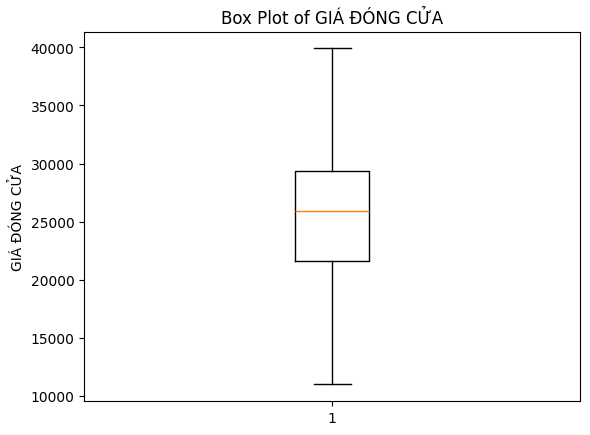

In [31]:
plt.boxplot(price_history['GIÁ ĐÓNG CỬA'])
plt.title('Box Plot of GIÁ ĐÓNG CỬA')
plt.ylabel('GIÁ ĐÓNG CỬA')
plt.show()

In [32]:
#lay gia dong cua moi ngay cuoi quy tu 2021-2025
price_history_sub = price_history.groupby(['Quý','Năm'])[['Ngày','GIÁ ĐÓNG CỬA']].first().reset_index()
price_history_sub = price_history_sub.sort_values(['Năm','Quý'])
price_history_sub

4,Quý,Năm,Ngày,GIÁ ĐÓNG CỬA
0,1,2021,2021-03-31,23673.687018
5,2,2021,2021-06-30,35433.115273
9,3,2021,2021-09-30,36396.345591
13,4,2021,2021-12-31,31924.204828
1,1,2022,2022-03-31,31029.776676
6,2,2022,2022-06-30,20272.727273
10,3,2022,2022-09-30,19272.727273
14,4,2022,2022-12-30,16363.636364
2,1,2023,2023-03-31,18909.090909
7,2,2023,2023-06-30,23772.727273


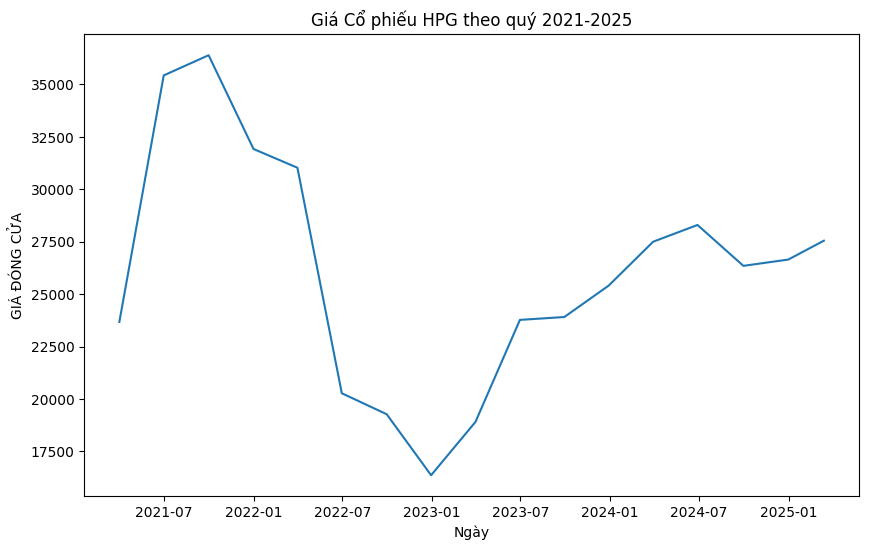

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=price_history_sub,x='Ngày',y='GIÁ ĐÓNG CỬA')
plt.title("Giá Cổ phiếu HPG theo quý 2021-2025")
plt.show()

In [34]:
# 2. Tiền xử lý dữ liệu
#◆ Tạo một bảng dữ liệu mới từ hai bảng đã cho.
#➢ Các cột dữ liệu trong bảng bao gồm các thông tin quan trọng cho việc tính toán và mô hình hóa thống kê từ hai bảng đã cho:
#➔ Dữ liệu lấy từ bảng Lịch sử giá (cần phải tính lại cho phù hợp nội dung của bảng Chỉ số tài chính): Mốc thời gian (quý/năm), Giá đóng cửa, Thay đổi giá, % thay đổi
#➔ Dữ liệu lấy từ bảng Chỉ số tài chính của công ty, bao gồm các chỉ số có khả năng ảnh hưởng tới giá cổ phiếu:
#Biên lợi nhuận gộp,
#Biên lợi nhuận ròng,
#P/E (tỷ lệ giá trên lợi nhuận Price to Earnings Ratio),
#EPS (lợi nhuận trên mỗi cổ phiếu Earnings Per Share),
#Tăng trưởng EPS, ROE (tỷ suất sinh lời trên vốn chủ sở hữu),
#tỷ lệ Nợ phải trả/Vốn chủ sở hữu,
#Khả năng thanh toán tổng quát,
#Vòng quay tài sản (Asset turnover ratio),
#Giá trị sổ sách (Book Value Per Share).
# Mỗi hàng là các chỉ số trong một quý.
# Cách lấy số liệu cho mỗi hàng:
#➔ Dữ liệu theo của quý đó trong Báo cáo Chỉ số tài chính của công ty.
#➔ Đối với dữ liệu về Lịch sử giá thì tính trung bình dữ liệu của ngày cuối cùng của quý đó và 14 ngày trước và sau ngày đó.
#➔ VD: Ngày cuối cùng của quý 4/2024 là ngày 31/12/2024, vậy để tính giá cổ phiếu của quý 4/2024 ta sẽ tính trung bình giá cổ phiếu từ ngày 17/12/2024 đến ngày 14/01/2025.
#➔ Như vậy thì các cột Thay đổi giá và % thay đổi cũng phải tính lại theo giá trị mới của quý.

In [35]:
new_df = price_history[['Quý', 'Năm', 'GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', '% THAY ĐỔI']].copy()
quarterly_data = new_df.groupby(['Năm', 'Quý'])[['GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', '% THAY ĐỔI']].mean()
quarterly_data

4         GIÁ ĐÓNG CỬA  THAY ĐỔI GIÁ  % THAY ĐỔI
Năm  Quý                                        
2021 1    23432.436427     11.673416    0.000424
     2    31843.282928    189.668198    0.006197
     3    33765.200274     15.050474    0.000169
     4    35607.726829    -67.759709   -0.002131
2022 1    31724.915797    -15.421175   -0.000732
     2    25783.700691   -173.500797   -0.007286
     3    20816.051136    -15.625000   -0.000961
     4    15520.279720    -44.755245   -0.003432
2023 1    18818.952234     47.457627    0.002776
     2    20172.287390     86.290323    0.003806
     3    24953.102453      5.555556    0.000367
     4    23739.160839     25.384615    0.001144
2024 1    26384.437596     38.983051    0.001419
     2    27906.333830     14.754098    0.000583
     3    26625.781250    -30.468750   -0.001044
     4    26809.848485      4.545455    0.000240
2025 1    26795.744681     19.148936    0.000811

In [36]:
quarterly_avg_data = pd.DataFrame(columns=['Quý', 'Năm', 'Giá đóng cửa trung bình', 'Thay đổi giá trung bình', '% Thay đổi trung bình'])

for year, quarter in price_history.groupby(['Năm', 'Quý']).groups:
    quarter_df = price_history[(price_history['Năm'] == year) & (price_history['Quý'] == quarter)]
    last_day_of_quarter = quarter_df['Ngày'].max()

    start_date = last_day_of_quarter - pd.DateOffset(days=14)
    end_date = last_day_of_quarter + pd.DateOffset(days=14)

    avg_data_df = price_history[(price_history['Ngày'] >= start_date) & (price_history['Ngày'] <= end_date)]

    avg_closing_price = avg_data_df['GIÁ ĐÓNG CỬA'].mean()
    avg_price_change = avg_data_df['THAY ĐỔI GIÁ'].mean()
    avg_percentage_change = avg_data_df['% THAY ĐỔI'].mean()

    new_row = pd.DataFrame({'Quý': [quarter], 'Năm': [year], 'Giá đóng cửa trung bình': [avg_closing_price],
                           'Thay đổi giá trung bình': [avg_price_change], '% Thay đổi trung bình': [avg_percentage_change]})
    quarterly_avg_data = pd.concat([quarterly_avg_data, new_row], ignore_index=True)

quarterly_avg_data[['Quý','Năm']] = quarterly_avg_data[['Quý','Năm']].astype(int)

<ipython-input-36-11e7aeef3256>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_avg_data = pd.concat([quarterly_avg_data, new_row], ignore_index=True)


In [37]:
financial_indicatior.reset_index(inplace=True)
financial_indicatior[['Quý', 'Năm']] = financial_indicatior['CHỈ TIÊU'].str.split('/', expand=True)
financial_indicatior['Quý'] = financial_indicatior['Quý'].str.extract(r'Q(\d)').astype(int)
financial_indicatior['Năm'] = financial_indicatior['Năm'].astype(int)

financial_indicatior.head()
financial_indicatior.drop(columns=['CHỈ TIÊU'], inplace=True)

In [38]:
financial_indicatior.sort_values(by=['Năm', 'Quý'], inplace=True)
financial_indicatior

Unnamed: 0,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế,...,Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP),Quý,Năm
39,5837935914731,-0.1040,1016003570888,-0.2689,769389827581,-0.2795,738485384068,-0.3104,648874743256,-0.2545,...,0.3394,1.922249,2.324247,0.537283,0.280573,18.716666,25286199505500,732933319,1,2015
38,7647766441121,0.1447,1699380898794,0.1861,1431785358141,0.3240,1407764434588,0.2956,1239117112410,0.3135,...,0.2621,1.825611,2.361578,0.617128,0.368196,33.959113,22867028152800,732917569,2,2015
37,6845199488945,0.1911,1560486391763,0.1734,1149724043160,0.0759,1160633509272,0.1327,1032198879175,0.2046,...,0.2638,1.787458,2.335319,0.562985,0.329552,23.192123,19787765913000,732880219,3,2015
36,7121776879509,0.0821,1304848323910,0.2615,729136428533,0.2321,682848723009,0.1633,565167885396,0.1932,...,0.2575,1.806813,2.310157,0.498651,0.313458,15.040987,25650807665000,732880219,4,2015
35,7142386716272,0.2234,1430865248572,0.4083,1207844706988,0.5699,1211372613286,0.6403,1022062465158,0.5751,...,0.1741,1.702886,2.544859,0.607104,0.406649,20.311391,31659349780800,732855319,1,2016
34,8048249751501,0.0524,2571508469415,0.5132,2362632124444,0.6501,2381777336224,0.6919,2025781711677,0.6349,...,0.1300,1.653105,2.726740,0.581202,0.389418,42.794444,34553391896000,842765656,2,2016
33,8142079264288,0.1895,2116907584585,0.3566,1857476335276,0.6156,1855716288704,0.5989,1604805364634,0.5547,...,0.1144,1.651486,2.737113,0.622591,0.376860,33.960771,36407476339200,842765656,3,2016
32,9950499922926,0.3972,2639126756349,1.0226,2256631583691,2.0949,2252940497691,2.2993,1949186323380,2.4489,...,0.0609,1.711367,2.484674,0.637312,0.422494,44.132299,38493249262650,1264146117,4,2016
31,10264754260071,0.4372,2463498226194,0.7217,2239619587833,0.8542,2242908787766,0.8515,1934215457230,0.8925,...,0.0734,1.693100,2.377110,0.761609,0.556626,33.415961,49224934628100,1516947138,1,2017
30,10612082569572,0.3186,2188957530474,-0.1488,1797277836871,-0.2393,1807855656986,-0.2410,1537805531989,-0.2409,...,0.0122,1.664093,2.371727,0.817271,0.611138,18.634043,56125657901000,1516909673,2,2017


In [39]:
merged_df = pd.merge(financial_indicatior, quarterly_avg_data, left_on=['Năm', 'Quý'], right_on=['Năm', 'Quý'], how='inner')
merged_df

,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế,...,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP),Quý,Năm,Giá đóng cửa trung bình,Thay đổi giá trung bình,% Thay đổi trung bình
0,31176874687620,0.6210,8183041939039,1.1746,7683336750890,1.9151,7690213194491,1.8942,6977554343152,2.0533,...,0.702713,0.482008,15.713484,210674659452600,4472922706,1,2021,24292.748634,166.207204,0.006455
1,35118355099565,0.7196,11477059063597,2.0973,10323744211031,2.3507,10349452188126,2.3431,9721406525008,2.5443,...,0.614741,0.459045,20.772755,255403886512600,4472922706,2,2021,34484.628276,-268.656075,-0.008312
2,38673828690685,0.5667,11860898846413,1.2946,10961075848180,1.5846,10978756069697,1.5700,10351739079315,1.7438,...,0.693819,0.483601,19.569189,188757338193200,4472922706,3,2021,36920.552567,170.367267,0.004468
3,44710731501475,0.7344,9587409683943,0.5298,8040286636164,0.5080,8038356261876,0.5081,7427443249985,0.6015,...,0.708146,0.554151,16.258192,193677553169800,4472922706,4,2021,31674.796978,-43.001353,-0.001414
4,44058146671026,0.4132,10108326381223,0.2353,8924403779643,0.1615,8922103855907,0.1602,8216960357730,0.1776,...,0.833755,0.639211,18.756963,124436413980000,5814785700,1,2022,31690.277465,-44.721408,-0.001489
5,37422054617017,0.0656,6539622247077,-0.4302,4312596514808,-0.5823,4379340489328,-0.5769,4032232311020,-0.5852,...,0.669412,0.478195,9.442808,113388321150000,5814785700,2,2022,20147.685648,-2.191357,-0.000502
6,34103341328754,-0.1182,1000727554455,-0.9156,-1351520454161,-1.1233,-1299955296196,-1.1184,-1774133616408,-1.1714,...,0.730601,0.536488,1.522314,105829099740000,5814785700,3,2022,18770.562771,-179.653680,-0.009811
7,25825731843835,-0.4224,-885249943204,-1.0923,-2091449212982,-1.2601,-2078547921756,-1.2586,-1991548498312,-1.2681,...,0.737730,0.554502,0.618442,120366063990000,5814785700,4,2022,17388.636364,36.136364,0.001279
8,26588751786987,-0.3965,1676437100329,-0.8342,491893455391,-0.9449,532042789767,-0.9404,397497275202,-0.9516,...,0.752669,0.519735,3.203166,156999213900000,5814785700,1,2023,18852.813853,-9.523810,-0.000377
9,29496383378315,-0.2118,3194986964850,-0.5114,1715017002029,-0.6023,1701886953766,-0.6114,1460042613098,-0.6379,...,0.770216,0.525606,4.270805,150021471060000,5814785700,2,2023,23603.896104,207.142857,0.008363


In [40]:
merged_df['Quý năm'] = 'Q' + merged_df['Quý'].astype(str) + '/' + merged_df['Năm'].astype(str)
merged_df.set_index('Quý năm', inplace=True)


In [41]:
merged_df

,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế,...,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP),Quý,Năm,Giá đóng cửa trung bình,Thay đổi giá trung bình,% Thay đổi trung bình
Quý năm,,,,,,,,,,,,,,,,,,,,,
Q1/2021,31176874687620,0.6210,8183041939039,1.1746,7683336750890,1.9151,7690213194491,1.8942,6977554343152,2.0533,...,0.702713,0.482008,15.713484,210674659452600,4472922706,1,2021,24292.748634,166.207204,0.006455
Q2/2021,35118355099565,0.7196,11477059063597,2.0973,10323744211031,2.3507,10349452188126,2.3431,9721406525008,2.5443,...,0.614741,0.459045,20.772755,255403886512600,4472922706,2,2021,34484.628276,-268.656075,-0.008312
Q3/2021,38673828690685,0.5667,11860898846413,1.2946,10961075848180,1.5846,10978756069697,1.5700,10351739079315,1.7438,...,0.693819,0.483601,19.569189,188757338193200,4472922706,3,2021,36920.552567,170.367267,0.004468
Q4/2021,44710731501475,0.7344,9587409683943,0.5298,8040286636164,0.5080,8038356261876,0.5081,7427443249985,0.6015,...,0.708146,0.554151,16.258192,193677553169800,4472922706,4,2021,31674.796978,-43.001353,-0.001414
Q1/2022,44058146671026,0.4132,10108326381223,0.2353,8924403779643,0.1615,8922103855907,0.1602,8216960357730,0.1776,...,0.833755,0.639211,18.756963,124436413980000,5814785700,1,2022,31690.277465,-44.721408,-0.001489
Q2/2022,37422054617017,0.0656,6539622247077,-0.4302,4312596514808,-0.5823,4379340489328,-0.5769,4032232311020,-0.5852,...,0.669412,0.478195,9.442808,113388321150000,5814785700,2,2022,20147.685648,-2.191357,-0.000502
Q3/2022,34103341328754,-0.1182,1000727554455,-0.9156,-1351520454161,-1.1233,-1299955296196,-1.1184,-1774133616408,-1.1714,...,0.730601,0.536488,1.522314,105829099740000,5814785700,3,2022,18770.562771,-179.653680,-0.009811
Q4/2022,25825731843835,-0.4224,-885249943204,-1.0923,-2091449212982,-1.2601,-2078547921756,-1.2586,-1991548498312,-1.2681,...,0.737730,0.554502,0.618442,120366063990000,5814785700,4,2022,17388.636364,36.136364,0.001279
Q1/2023,26588751786987,-0.3965,1676437100329,-0.8342,491893455391,-0.9449,532042789767,-0.9404,397497275202,-0.9516,...,0.752669,0.519735,3.203166,156999213900000,5814785700,1,2023,18852.813853,-9.523810,-0.000377


<Axes: xlabel='Quý năm'>

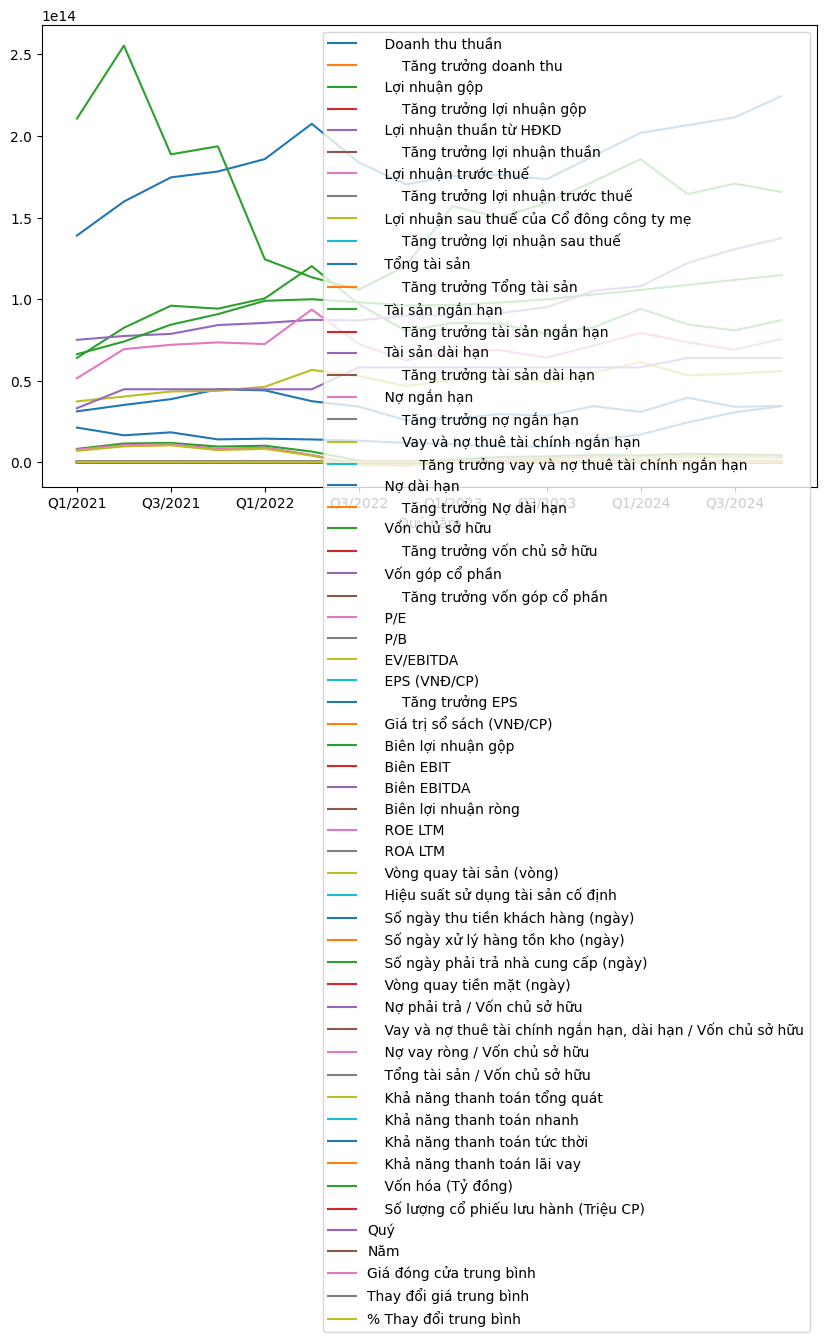

In [42]:
merged_df.plot(figsize=(10, 6))

In [ ]:
from scipy.signal import argrelextrema

# 1. Vẽ biểu đồ giá cổ phiếu (đã có từ trước)
plt.figure(figsize=(12, 6))
plt.plot(price_history['Ngày'], price_history['GIÁ ĐÓNG CỬA'], label='Giá đóng cửa')
plt.title('Biểu đồ biến động giá cổ phiếu HPG với Đỉnh và Đáy (Xác định theo cực trị cục bộ)')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.grid(True)
plt.legend()

# 2. Xác định đỉnh và đáy theo phương pháp cực trị cục bộ
# --- Điều chỉnh tham số này ---
order = 20  # Số lượng điểm lân cận để so sánh (ví dụ: 5 ngày trước và 5 ngày sau)

# Tìm các chỉ số của đỉnh (local maxima)
peak_indices = argrelextrema(price_history['GIÁ ĐÓNG CỬA'].values, np.greater_equal, order=order)[0]
peaks = price_history.iloc[peak_indices]

# Tìm các chỉ số của đáy (local minima)
trough_indices = argrelextrema(price_history['GIÁ ĐÓNG CỬA'].values, np.less_equal, order=order)[0]
troughs = price_history.iloc[trough_indices]

# 3. Chú thích đỉnh và đáy trên biểu đồ
plt.plot(peaks['Ngày'], peaks['GIÁ ĐÓNG CỬA'], "x", color="red", label=f'Đỉnh (Cực trị cục bộ, order={order})')
plt.plot(troughs['Ngày'], troughs['GIÁ ĐÓNG CỬA'], "o", color="green", label=f'Đáy (Cực trị cục bộ, order={order})')

# Thêm chú thích và hiển thị biểu đồ
plt.title('Biểu đồ biến động giá cổ phiếu HPG với Đỉnh và Đáy (Xác định theo cực trị cục bộ)')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.grid(True)
plt.legend()
plt.show()

# 4. In ra thông tin về các đỉnh và đáy
print("Quan sát các đỉnh và đáy cổ phiếu (dựa trên biểu đồ và phân tích cực trị cục bộ):")

# In thông tin về đỉnh
print("\n**Các đỉnh:**")
for index, row in peaks.iterrows():
    peak_date = row['Ngày'].strftime('%d/%m/%Y')
    peak_price = row['GIÁ ĐÓNG CỬA']
    print(f"- Ngày: {peak_date}, Giá: {peak_price:,.0f} VNĐ")

# In thông tin về đáy
print("\n**Các đáy:**")
for index, row in troughs.iterrows():
    trough_date = row['Ngày'].strftime('%d/%m/%Y')
    trough_price = row['GIÁ ĐÓNG CỬA']
    print(f"- Ngày: {trough_date}, Giá: {trough_price:,.0f} VNĐ")

print("\n**Lưu ý:**")
print("- Đỉnh và đáy được xác định dựa trên phương pháp tìm cực trị cục bộ.")
print("- **Để xác định đỉnh và đáy phù hợp hơn, hãy điều chỉnh tham số order trong code.**")
print("- order: Xác định số lượng điểm lân cận ở mỗi bên để so sánh. Giá trị này càng lớn, thuật toán sẽ càng bỏ qua các đỉnh và đáy nhỏ và tập trung vào các đỉnh và đáy lớn hơn.")
print("- Quan sát biểu đồ và phần in ra để đánh giá kết quả và điều chỉnh tham số cho phù hợp.")
print("- Cần kết hợp với kiến thức về phân tích kỹ thuật và bối cảnh thị trường để đưa ra kết luận.")

In [ ]:
##3. Lựa chọn các yếu tố nguy cơ (risk factors) tiềm năng cho mô hình tài chính
#Ở bước này, sinh viên sẽ sàng lọc ra một số yếu tố nguy cơ (risk factors) « tiềm năng » có thể gây ra biến động về giá cổ phiếu.
#Các factors này có thể đến từ trong chính công ty đó
#– các yếu tố nội tại (internal) – thể hiện bằng các chỉ số trong bảng báo cáo tài chính của công ty,
#hoặc từ thị trường bên ngoài tác động vào – ví dụ như các biến đổi trên thị trường chứng khoán thế giới, các ngành nghề liên quan, các yếu tố văn hóa chính trị, dịch bệnh,… khiến nền kinh tế bị trì trệ, v.v.
#Trong bài tập này chúng ta chỉ xét tới các yếu tố nội tại của chính công ty phát hành cổ phiếu.
#Để sàng lọc thì chúng ta cần tính độ tương quan Pearson của các chỉ số tài chính với giá cổ phiếu (dữ liệu được tạo ra ở mục 2).
#Từ đó đưa ra kết luận:
#➔ Giá cổ phiếu của công ty này có thể có mối quan hệ phụ thuộc vào những chỉ số tài chính nào?
###

In [ ]:
correlation_table = pd.DataFrame(columns=['Chỉ số tài chính', 'Hệ số tương quan Pearson'])

for column in merged_df.columns:
    if column not in ['Quý', 'Năm', 'Giá đóng cửa trung bình', 'Thay đổi giá trung bình', '% Thay đổi trung bình']:
        correlation_value = merged_df[column].corr(merged_df['Giá đóng cửa trung bình'])
        new_row = pd.DataFrame({'Chỉ số tài chính': [column], 'Hệ số tương quan Pearson': [round(correlation_value, 3)]})
        correlation_table = pd.concat([correlation_table, new_row], ignore_index=True)

# Sắp xếp bảng độ tương quan theo giá trị tuyệt đối của hệ số tương quan giảm dần
correlation_table.sort_values(by='Hệ số tương quan Pearson', ascending=False, key=abs, inplace=True)
correlation_table.head()